<a href="https://colab.research.google.com/github/laugustovieira/prophet_covid/blob/main/prophet_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#modulo 03 aula 01 

In [556]:
url = '/content/drive/MyDrive/Dados_BootCamp/dados_covid_sp.csv'

In [557]:
import pandas as pd

In [558]:
dados = pd.read_csv(url, sep=";")

In [559]:
dados.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0        Adamantina      3500105   25  ...  -21,6820  -51,0737              9
1            Adolfo      3500204   25  ...  -21,2325  -49,6451              9
2             Aguaí      3500303   25  ...  -22,0572  -46,9735              9
3    Águas da Prata      3500402   25  ...  -21,9319  -46,7176              9
4  Águas de Lindóia      3500501   25  ...  -22,4733  -46,6314              9

[5 rows x 26 columns]

In [560]:
dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")

In [561]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

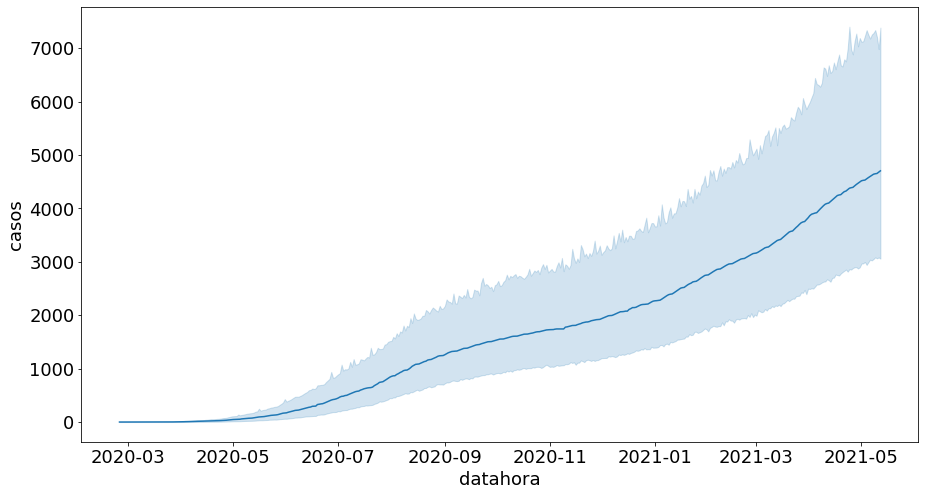

In [562]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)
sns.lineplot(x = "datahora", y="casos", data = dados)

# $$ e^x $$

In [563]:
import numpy as np

In [564]:
eixo_x = np.linspace(-2,2,100)

In [565]:
y_exp = np.exp(eixo_x)

Exemplo de curva logaritmica usando o numpy

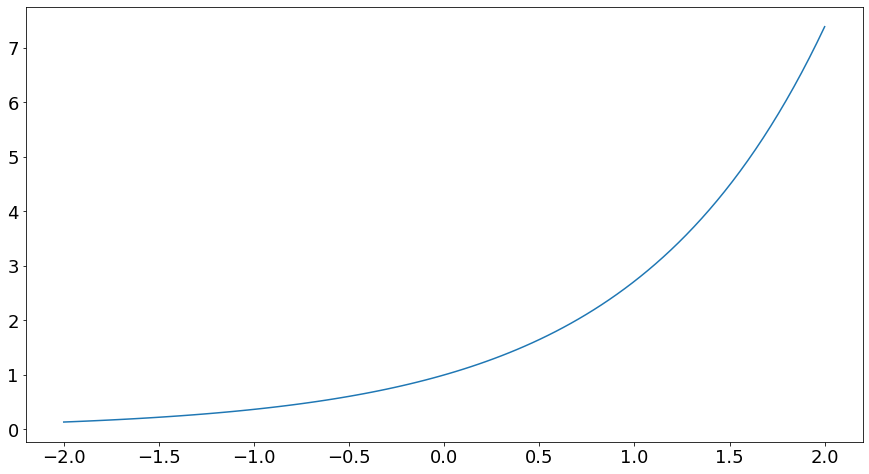

In [566]:
sns.lineplot(x=eixo_x, y = y_exp)

# $$log_2 2 = 1 $$
# $$log_2 2^x = X $$
# $$log_e e^x = x $$

Existe um crescimento exponencial para os dados. A reta mostra que o crecimento é ordenado

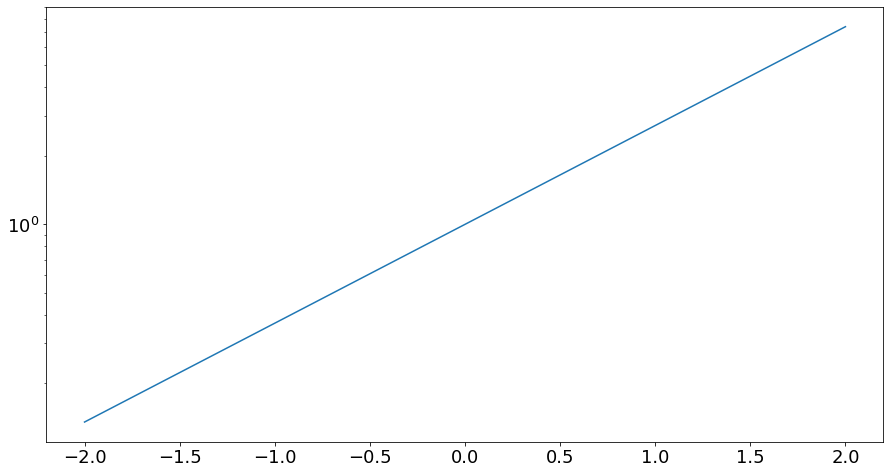

In [567]:
sns.lineplot(x=eixo_x, y=y_exp)
mpl.pyplot.yscale('log')

In [568]:
dados_sp = dados.query("nome_munic == 'São Paulo'")

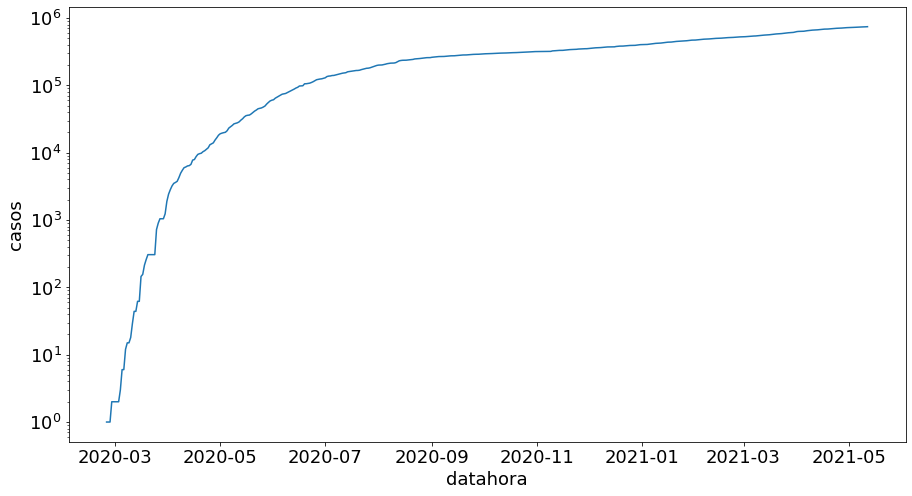

In [569]:
sns.lineplot(x="datahora", y="casos", data=dados_sp)
mpl.pyplot.yscale("log")

Crescimento exponencial do estado de são paulo. Não ordenado , porém é um crescimento exponencial

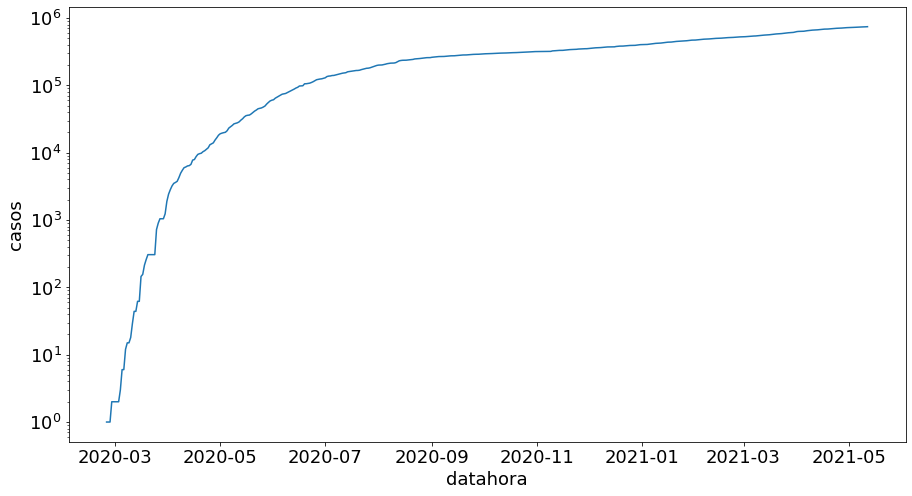

In [570]:
sns.lineplot(x="datahora", y="casos", data=dados_sp)
mpl.pyplot.yscale("log")

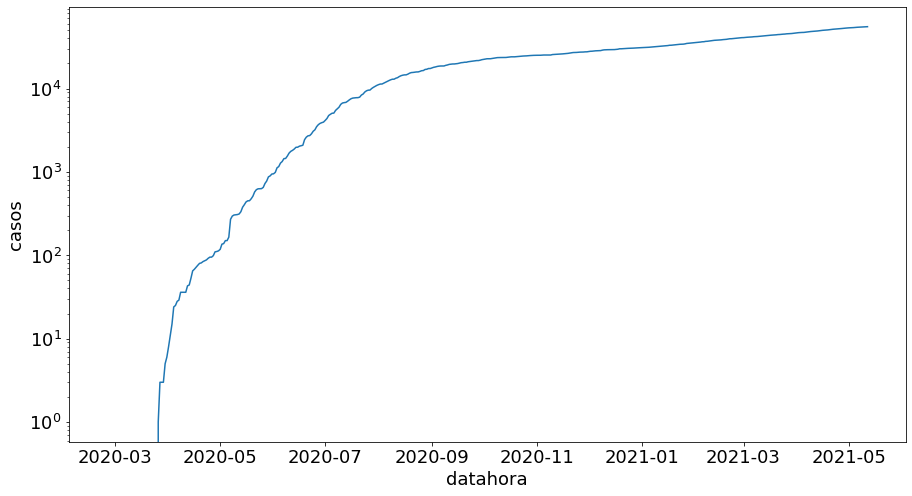

In [571]:
dados_rp = dados.query("nome_munic == 'Ribeirão Preto'")
sns.lineplot(x="datahora", y="casos", data=dados_rp)
mpl.pyplot.yscale("log")

#modulo 03 aula 01 

casos novos de covid

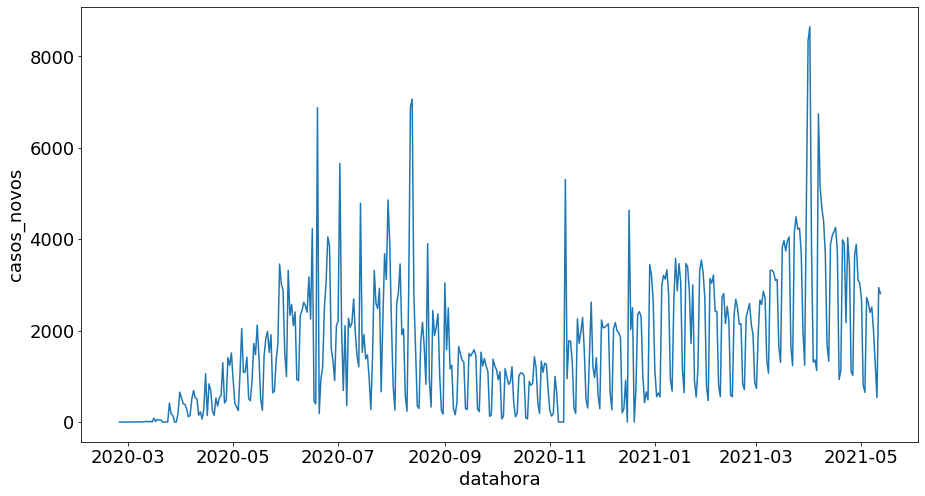

In [572]:
sns.lineplot(x="datahora", y="casos_novos", data = dados_sp)

mostrando um exemplo de diferenciação. Neste exemplo a diferenciação tem uma reta horizontal, pois o crescimento é horizontal e com um mesmo coeficiente que 1. Para gráficos exponenciais haverá variação na diferenciação

In [573]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))

In [574]:
dados_exemplo.head()

0
0  1.0
1  2.0
2  3.0
3  4.0
4  5.0

In [575]:
dados_exemplo["diferenciado"] = dados_exemplo.diff()

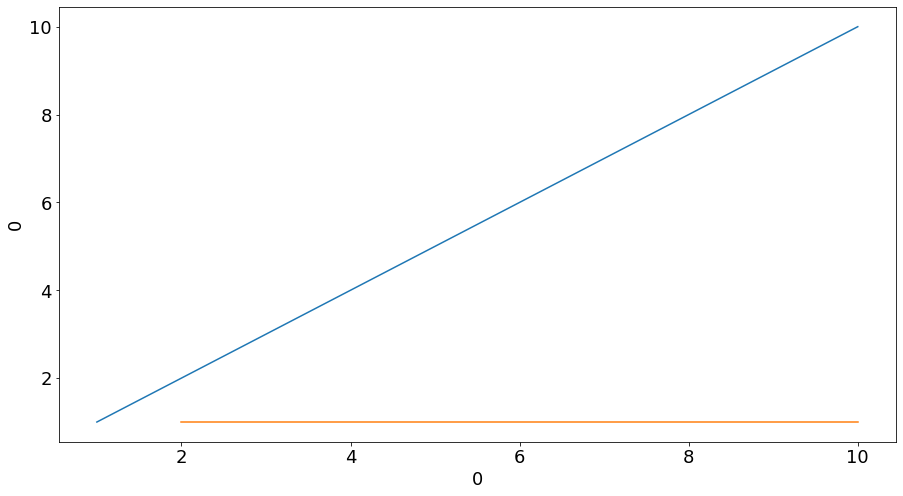

In [576]:
sns.lineplot(data = dados_exemplo,x=0, y=0)
sns.lineplot(data = dados_exemplo,x=0, y='diferenciado')

Fazendo uma diferenciação dos dados de são paulo

In [577]:
dados_sp["taxa_de_crescimento_casos"] = dados_sp["casos_novos"].diff()
dados_sp["taxa_de_crescimento_obitos"] = dados_sp["obitos_novos"].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



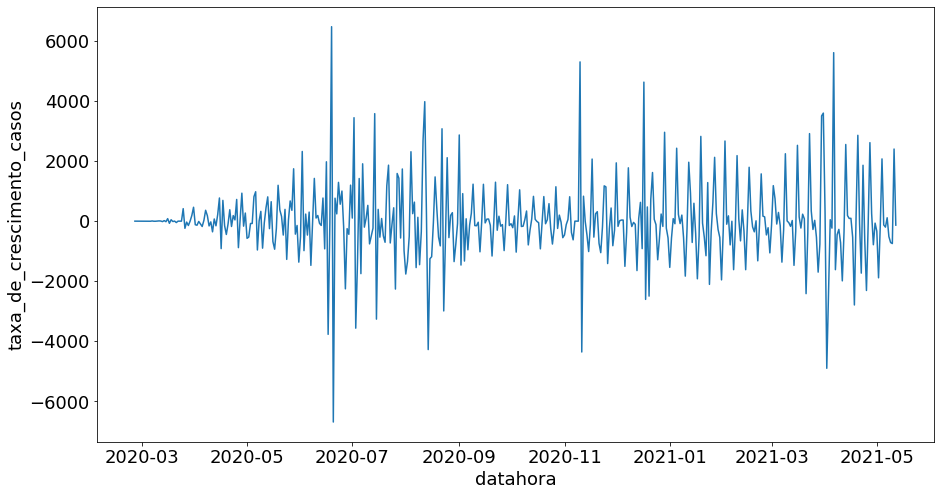

In [578]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data = dados_sp)

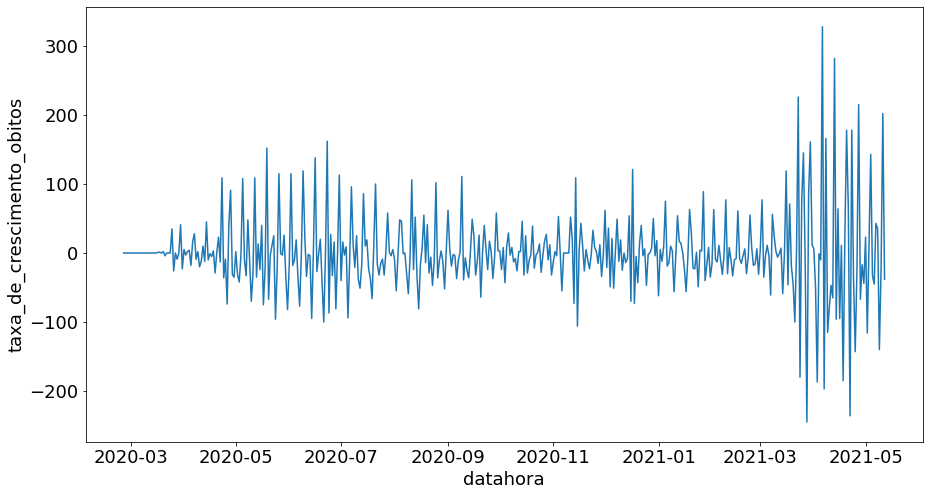

In [579]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data = dados_sp)

<BarContainer object of 443 artists>

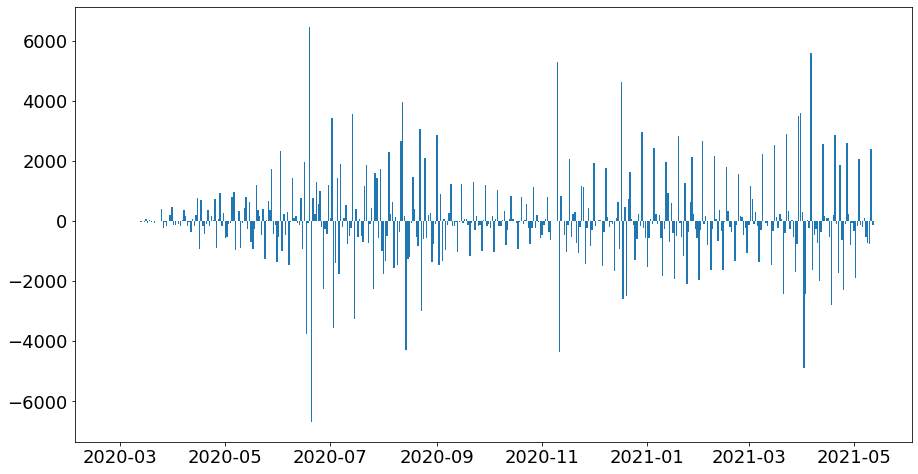

In [580]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [581]:
dados_sp["ano"] = pd.DatetimeIndex(dados_sp["datahora"]).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [582]:
dados_2021 = dados_sp.query('ano == "2021"')

<BarContainer object of 132 artists>

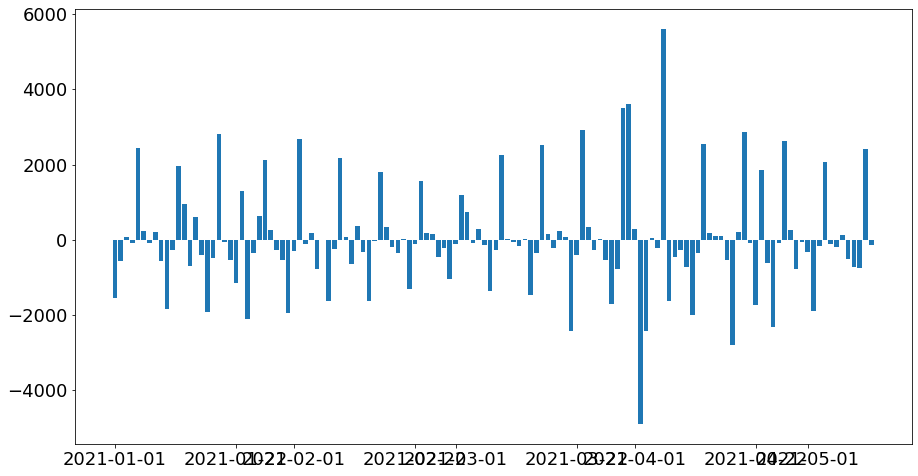

In [583]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

o gráfico acima é mais usado para análise, não é passado para uma pessoa leiga  analisar

Abaixo temos a criação de uma janela de 7 dias para média móvel, ou seja, a cada 7 dias é gerado uma média e vai rolando até o final da dataframe.
## A média móvel serve para suavisar os picos dos gráficos e diminuir o efeito de sazonalidade, mostrando de maneira mais fiel a tendencia destes dados

In [584]:
dados_sp["media_movel_casos"] = dados_sp["casos_novos"].rolling(window=7, center=False).mean()
dados_sp["media_movel_obitos"] = dados_sp["obitos_novos"].rolling(window=7, center=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



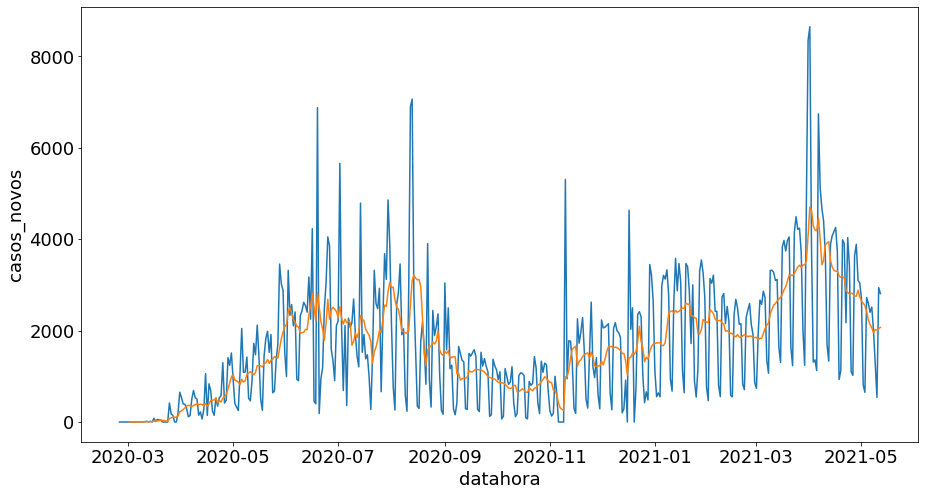

In [585]:
sns.lineplot(x = "datahora", y= "casos_novos", data = dados_sp)
sns.lineplot(x="datahora", y="media_movel_casos", data=dados_sp )

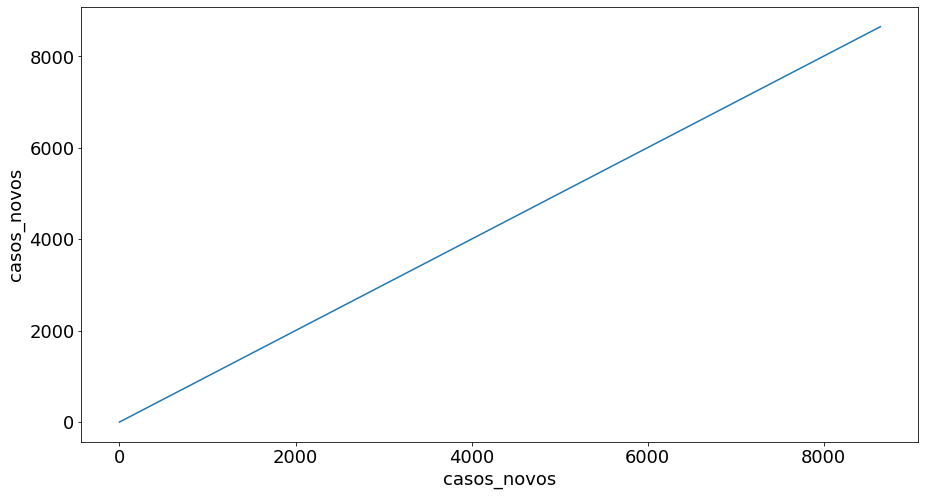

In [586]:
#verificando correlação. Verificando uma correlação perfeita, correlacionando a mesma variável
sns.lineplot(x="casos_novos", y="casos_novos", data = dados_sp)

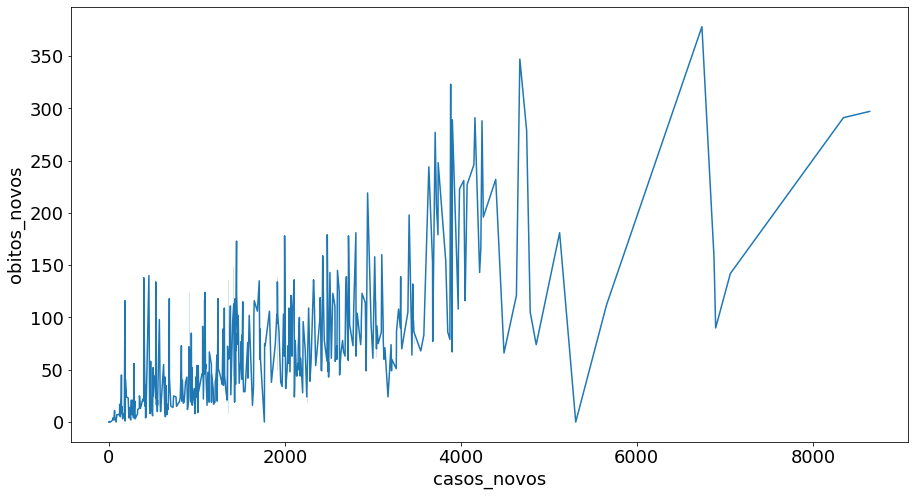

In [587]:
sns.lineplot(x="casos_novos", y="obitos_novos", data = dados_sp)

In [588]:
dados_202005 = dados_sp.query("mes == 5 & ano == 2020")
dados_202101 = dados_sp.query("mes == 1 & ano == 2021")
dados_202102 = dados_sp.query("mes == 2 & ano == 2021")
dados_202103 = dados_sp.query("mes == 3 & ano == 2021")
dados_202104 = dados_sp.query("mes == 4 & ano == 2021")

#Abaixo observamos a sazonalidade dos dados, onde existe um padrão no comportamento dos dados na linha do tempo.

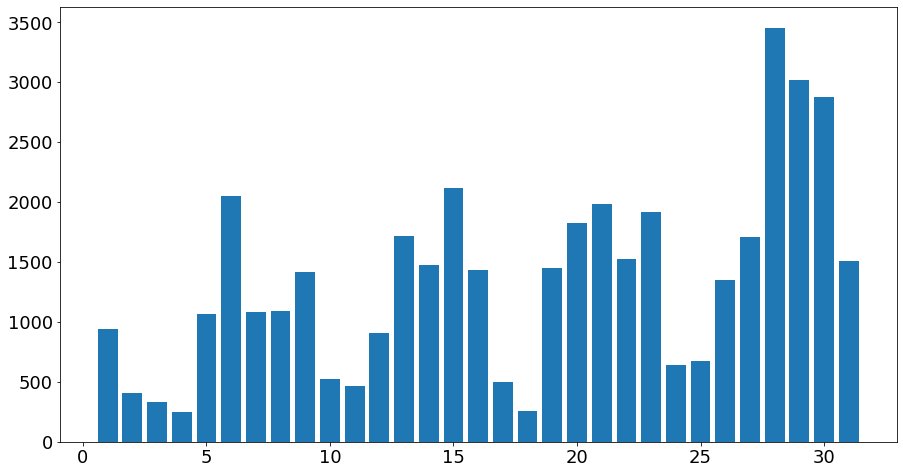

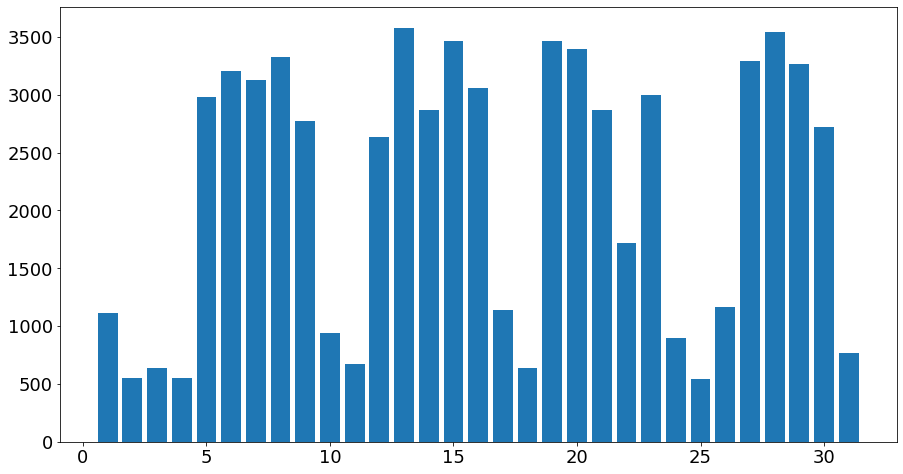

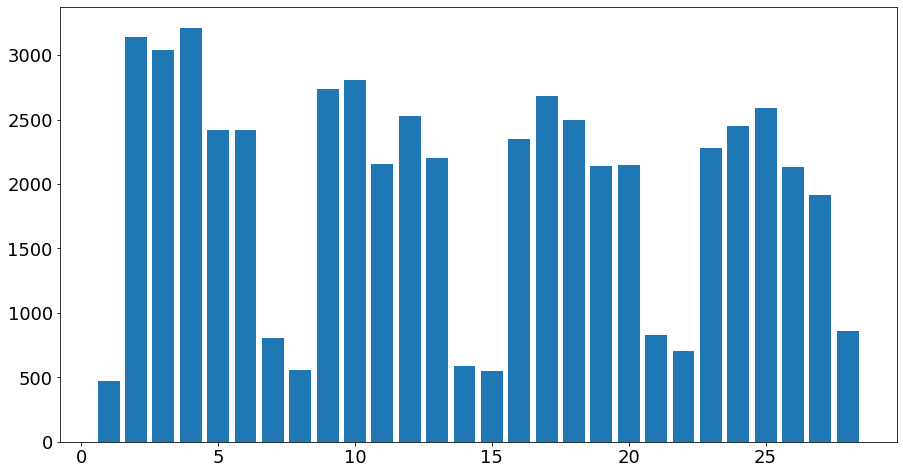

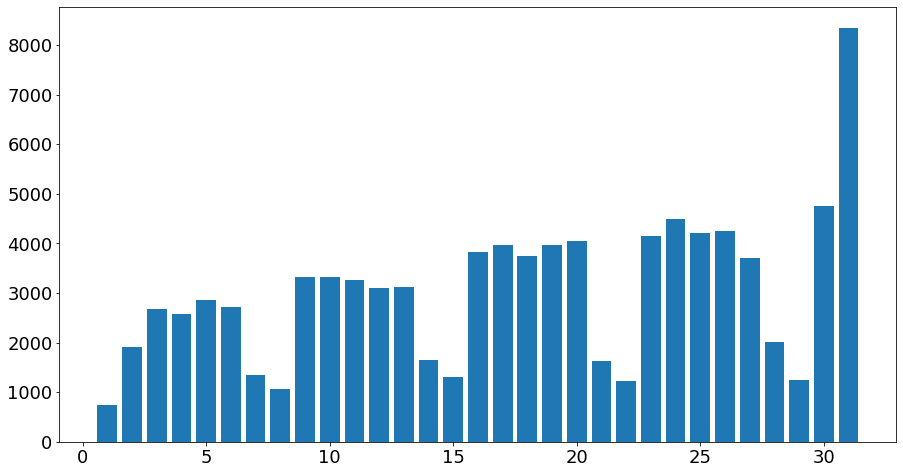

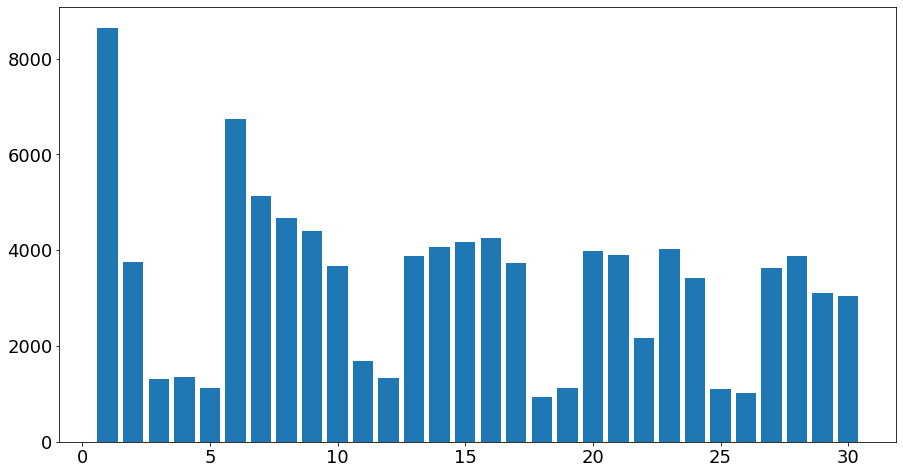

In [589]:
plt.bar(np.linspace(1,31,31),  dados_202005["casos_novos"])
plt.show()
plt.bar(np.linspace(1,31,31),  dados_202101["casos_novos"])
plt.show()
plt.bar(np.linspace(1,28,28),  dados_202102["casos_novos"])
plt.show()
plt.bar(np.linspace(1,31,31),  dados_202103["casos_novos"])
plt.show()
plt.bar(np.linspace(1,30,30),  dados_202104["casos_novos"])
plt.show()

In [590]:
from pandas.plotting import autocorrelation_plot

#O gráfico abaixo mostra que existe uma correlação entre os dados no tempo. A medida que ao tempo passa esta correlação diminui.quanto mais próximo de 0 menos correlação.

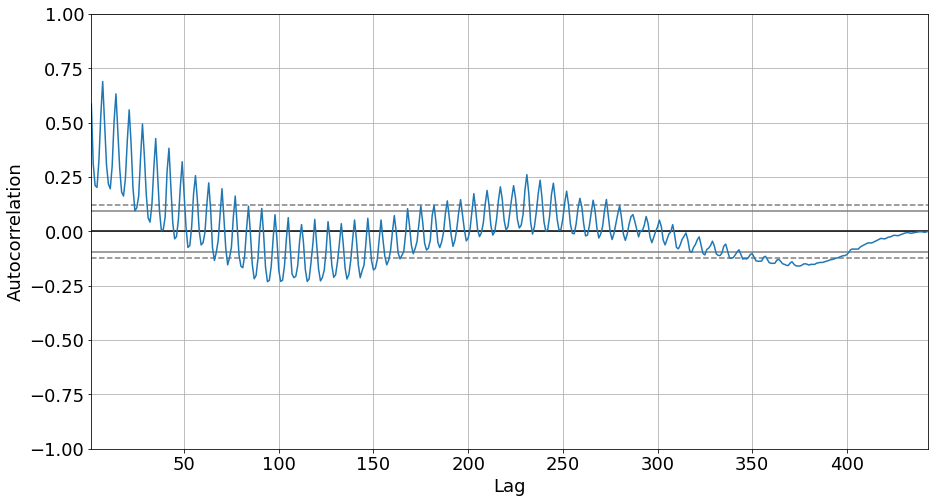

In [591]:
autocorrelation_plot(dados_sp["casos_novos"])

#Abaixo temos um exemplo por meio de numeros aleatórios de correlação baixa.

In [592]:
dados_sp.shape

(443, 31)

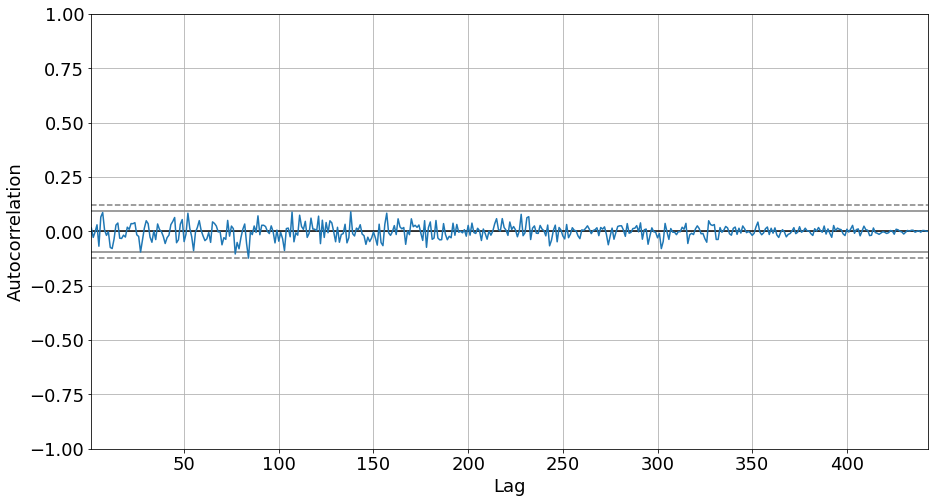

In [593]:
aleatorio = np.random.rand(443)
autocorrelation_plot(aleatorio)

#Nesta aula:
 - Aprendemos o que é uma série temporal;

 - Calculamos a taxa de crescimento de um evento em uma série temporal;

 - Aprendemos o que é uma média móvel;

 - Entendemos o que é correlação e função de autocorrelação.

#Módulo 03 Aula 02

In [594]:
df = pd.DataFrame()

In [595]:
df['ds'] = dados_sp['datahora']

In [596]:
df['y'] = dados_sp['casos_novos']

In [597]:
from fbprophet import Prophet

In [598]:
#ajustar uma reta aos dados
modelo = Prophet()

In [599]:
#carregando o modelo com o dataframe
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [600]:
dataFramefuturo = modelo.make_future_dataframe(periods=30)

In [601]:
dataFramefuturo.head()

ds
0 2020-02-25
1 2020-02-26
2 2020-02-27
3 2020-02-28
4 2020-02-29

In [602]:
previsao = modelo.predict(dataFramefuturo)

In [603]:
#usa o DS e o YHAT para gerar a previsão
previsao.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25 -114.303728  ...                         0.0  386.013224
1 2020-02-26  -96.932780  ...                         0.0  457.834930
2 2020-02-27  -79.561833  ...                         0.0  571.148167
3 2020-02-28  -62.190885  ...                         0.0  306.251181
4 2020-02-29  -44.819937  ...                         0.0  -13.995200

[5 rows x 16 columns]

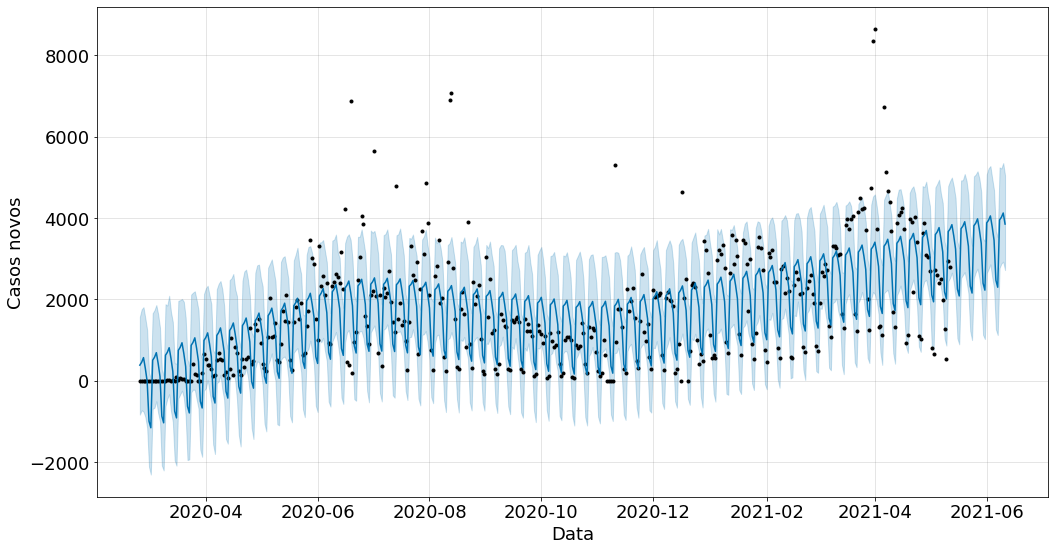

In [604]:
# alinha azul clao é um intervalo de confiança.
# o prophet consegue observar a sazonalidade dos dados. Ele mesmo identifica a sazonalidade.
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(15,8));

Criando teste e ajuste

In [605]:
df2 = pd.DataFrame()
df2['ds'] = dados_sp['datahora'][:400]
df2['y'] = dados_sp['casos_novos'][:400]
from fbprophet import Prophet
modelo2 = Prophet()
modelo2.fit(df2)
dataFramefuturo2 = modelo2.make_future_dataframe(periods=43)
previsao2 = modelo2.predict(dataFramefuturo2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [606]:
df2_teste = pd.DataFrame()
df2_teste['ds'] = dados_sp['datahora'][400:]
df2_teste['y'] = dados_sp['casos_novos'][400:]

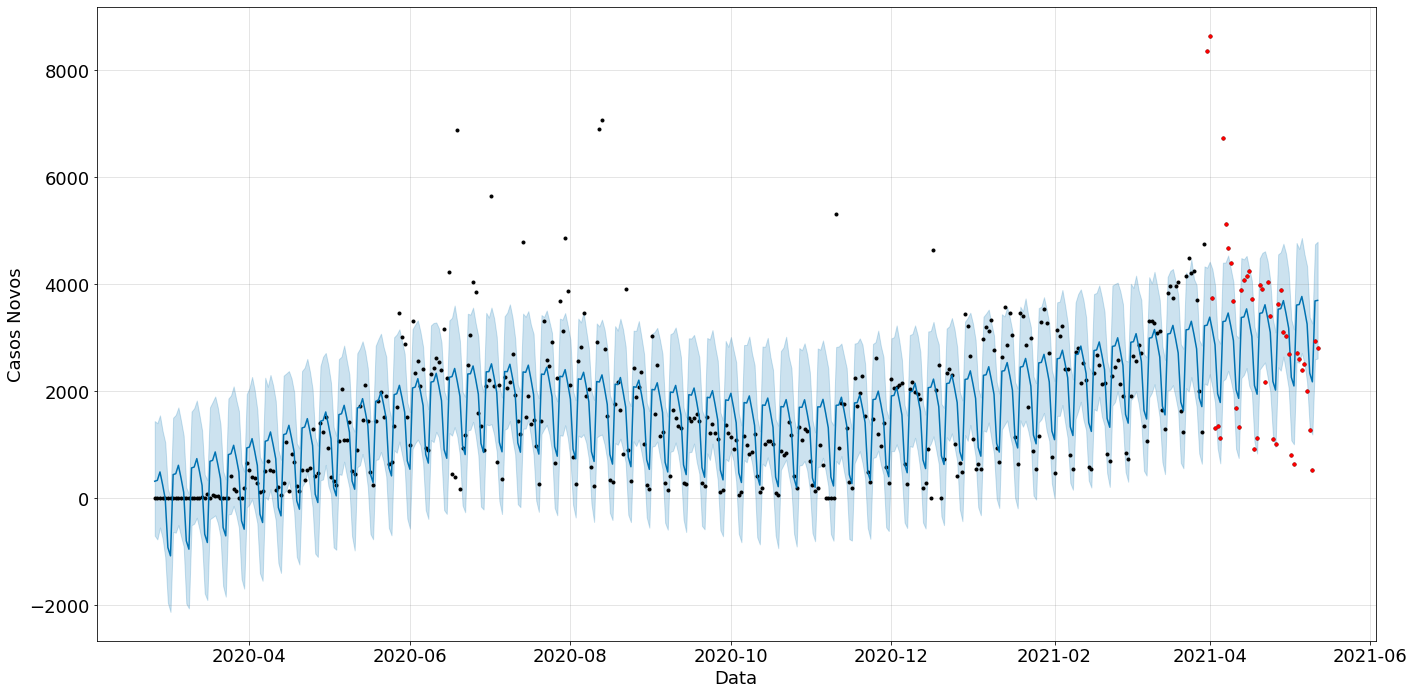

In [607]:
modelo.plot(previsao2, xlabel="Data", ylabel="Casos Novos", figsize=(20,10));
plt.plot(df2_teste['ds'], df2_teste['y'],'.r')

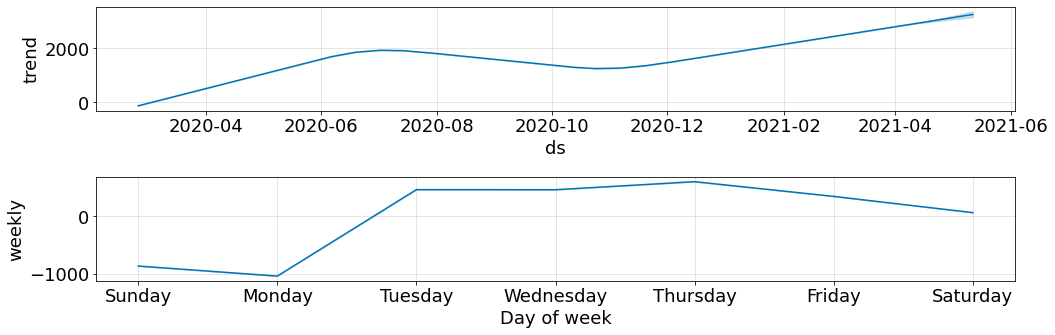

In [608]:
modelo2.plot_components(previsao2, figsize = (15,5));

#Nesta aula:
 - Vimos as primeiras previsões com o PROPHET;

 - Fizemos a decomposição de séries temporais.

#Aula 03 modulo 03

mudanças de tendências. Padrã que o gráfico está seguindo. Um gráfico possui uma tendÊncia que pode ser crescente e decrescente em uma linha temporal.

In [609]:
from fbprophet.plot import add_changepoints_to_plot

É possível ver o momento em que se está alterando a tedência da serie temporal

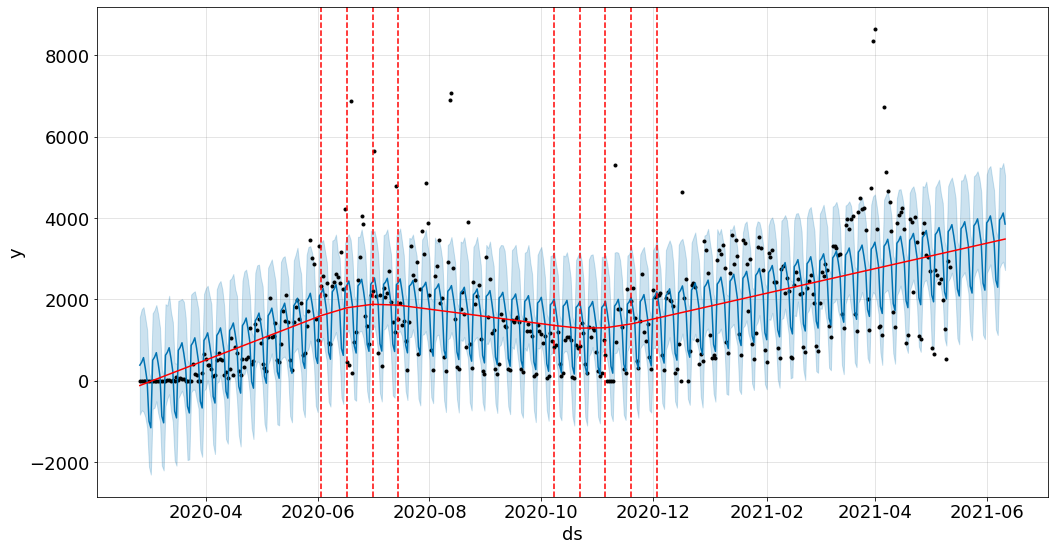

In [610]:
fig = modelo.plot(previsao,figsize=(15,8))
a = add_changepoints_to_plot(fig.gca(),modelo, previsao)

incluir mais change points aumentando a scala para não apresentar os change points na mesma área.
Aumentando a escala é como se usasemos uma lupa para ver mais de perto as mudanças da tendência. A medida que aumenta mais não há tanta variação.
Se diminuir muito a escala praticamente fica uma reta. 

In [611]:
modelo =  Prophet(n_changepoints=25, changepoint_prior_scale=10)

In [612]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [613]:
dataFramefuturo = modelo.make_future_dataframe(periods=43)

In [614]:
previsao = modelo.predict(dataFramefuturo)

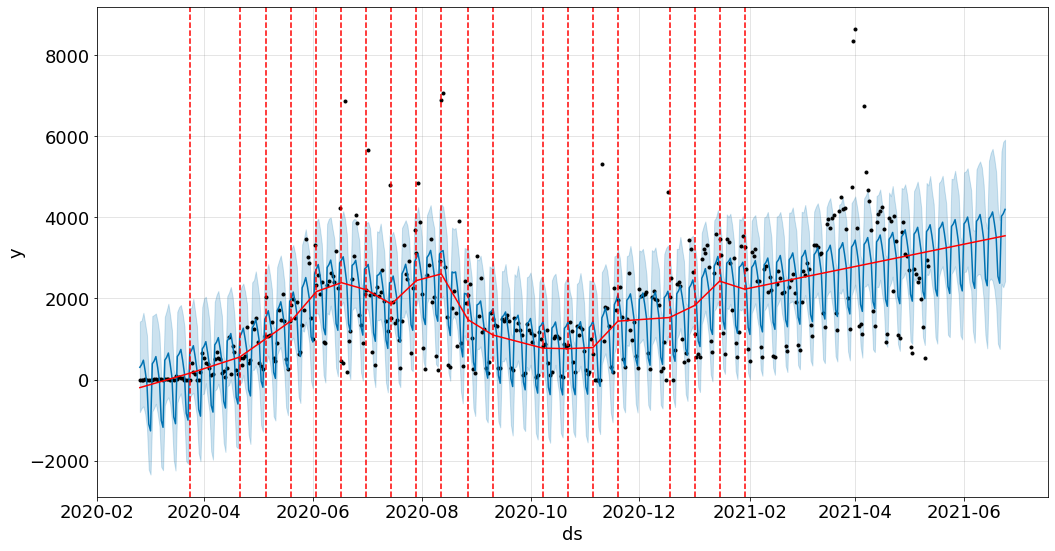

In [615]:
fig = modelo.plot(previsao,figsize=(15,8))
a = add_changepoints_to_plot(fig.gca(),modelo, previsao)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


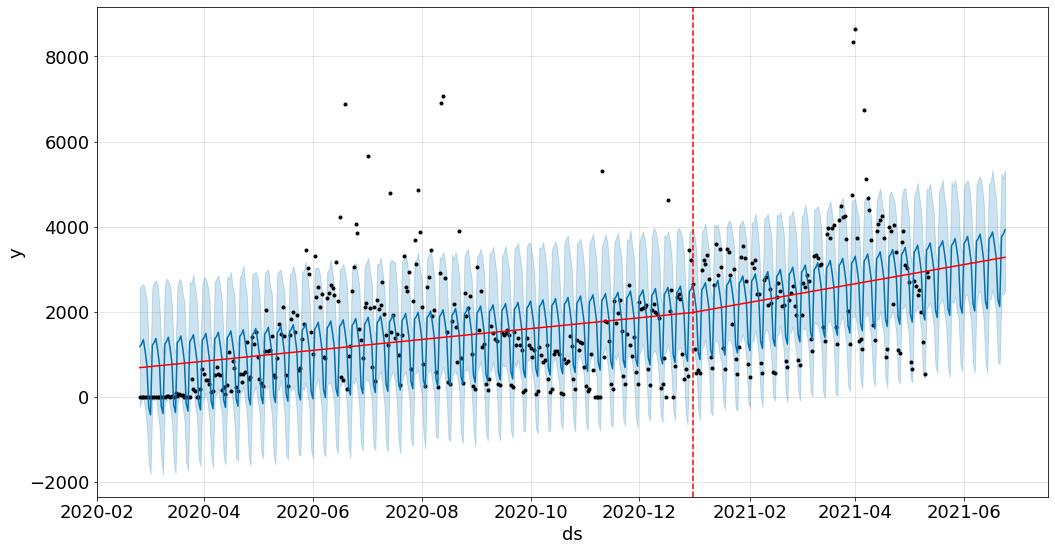

In [616]:
#adicionando um changepoint
modelo2 =  Prophet(changepoints=['2020-12-31'])
modelo2.fit(df)
dataFramefuturo = modelo2.make_future_dataframe(periods=43)
previsao = modelo2.predict(dataFramefuturo)
fig = modelo2.plot(previsao,figsize=(15,8))
a = add_changepoints_to_plot(fig.gca(),modelo2, previsao)

#Nesta aula, aprendemos:
- Curva com o crescimento logístico;

- Mudança de tendência em uma série temporal;

- Como decidir se houve mudança de tendência através de um gráfico de barras.

#Aula 04 modulo 03

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


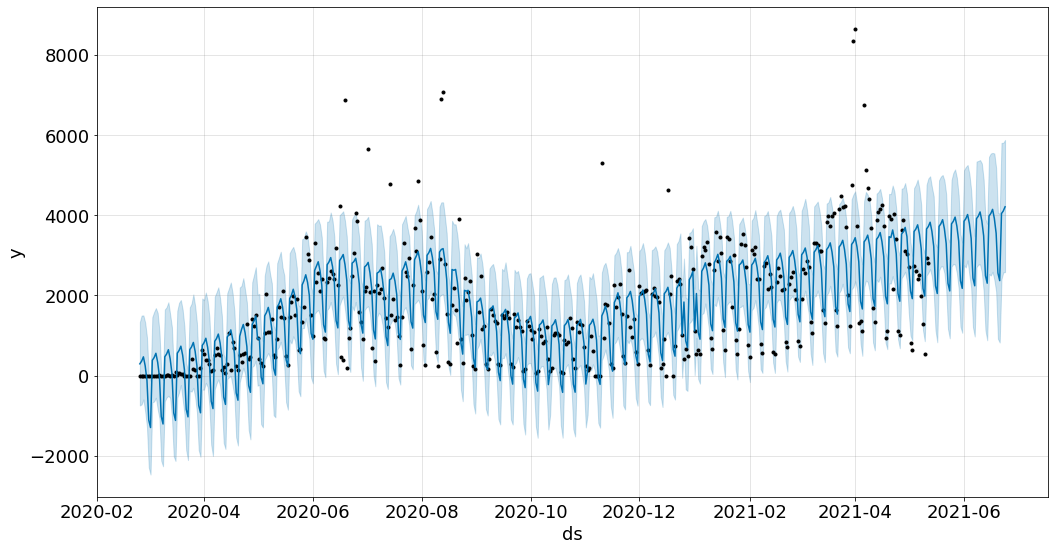

In [617]:
modelo =  Prophet(changepoint_prior_scale=10)
#incluindo os feriados de natal e ano novo (verifique que há uma diferença nos gráficos quando coloca o feriado)
modelo.add_country_holidays(country_name='BR')
modelo.fit(df)
dataFramefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataFramefuturo)
fig = modelo.plot(previsao,figsize=(15,8))


In [618]:
#incluir os feriados municipais de são paulo
lista_feriados_sp_2020= [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21',
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

lista_feriados_sp_2021= [
'2020-01-01',
'2020-01-25',
'2020-02-15',
'2020-02-16',
'2020-02-17',
'2020-03-26',
'2020-03-29',
'2020-03-30',
'2020-03-31',
'2020-04-01',
'2020-04-02',
'2020-4-21',
'2020-05-01'
]

In [619]:
#criar o data frame com os feriados de 2020
feriados_sp_2020 = pd.DataFrame({'holiday':'sp_2020',
                                 'ds': pd.to_datetime(lista_feriados_sp_2020)})

In [620]:
#listando os feriados de 2020
feriados_sp_2020

holiday         ds
0   sp_2020 2020-02-25
1   sp_2020 2020-02-26
2   sp_2020 2020-04-10
3   sp_2020 2020-04-21
4   sp_2020 2020-05-01
5   sp_2020 2020-05-20
6   sp_2020 2020-05-21
7   sp_2020 2020-05-22
8   sp_2020 2020-05-25
9   sp_2020 2020-06-11
10  sp_2020 2020-09-07
11  sp_2020 2020-10-12
12  sp_2020 2020-11-02
13  sp_2020 2020-11-15
14  sp_2020 2020-12-25

In [621]:
#criar o data frame com os feriados de 2021
feriados_sp_2021 = pd.DataFrame({'holiday':'sp_2021',
                                 'ds': pd.to_datetime(lista_feriados_sp_2021)})

In [622]:
#listando os feriados de 2021
feriados_sp_2021

holiday         ds
0   sp_2021 2020-01-01
1   sp_2021 2020-01-25
2   sp_2021 2020-02-15
3   sp_2021 2020-02-16
4   sp_2021 2020-02-17
5   sp_2021 2020-03-26
6   sp_2021 2020-03-29
7   sp_2021 2020-03-30
8   sp_2021 2020-03-31
9   sp_2021 2020-04-01
10  sp_2021 2020-04-02
11  sp_2021 2020-04-21
12  sp_2021 2020-05-01

In [623]:
#concatenando os 2 dataframes
feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [624]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y']  = dados_sp['casos_novos'][400:]

df_treino = pd.DataFrame()
df_treino['ds'] = dados_sp['datahora'][:400]
df_treino['y'] = dados_sp['casos_novos'][:400]

In [625]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays = feriados, seasonality_mode='additive')
#modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays = feriados, seasonality_mode='multiplicative')

In [626]:
modelo_feriados.fit(df_treino)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [627]:
dataFramefuturo = modelo_feriados.make_future_dataframe(periods=43)

In [628]:
previsao = modelo_feriados.predict(dataFramefuturo)

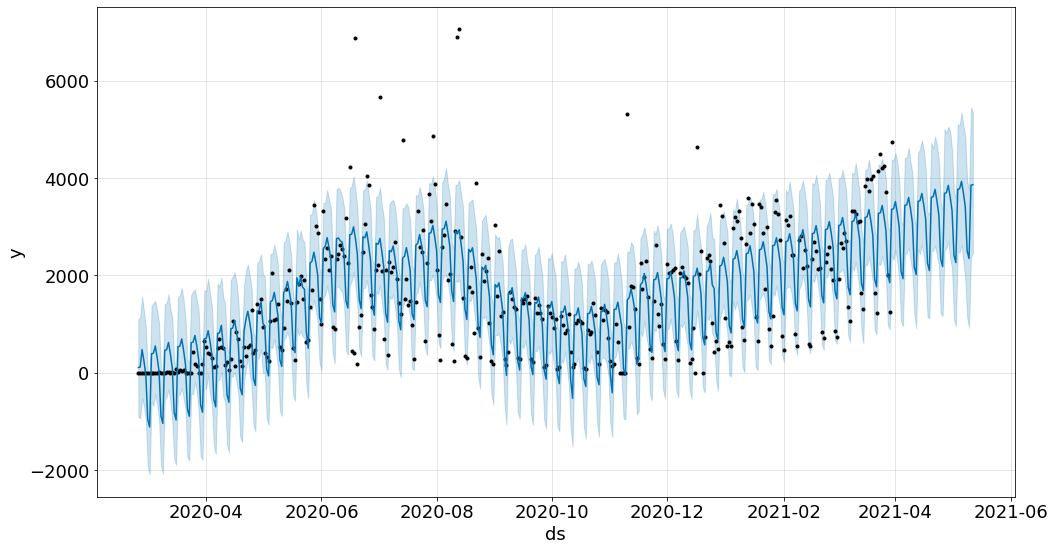

In [629]:
#sazonalidade additiva
fig = modelo_feriados.plot(previsao,figsize=(15,8))

In [630]:
from sklearn.metrics import mean_absolute_error

In [631]:
#sazonalidade aditiva. Modelo em seasonality_mode='additive'
#verificando quão distantes os pontos pretos estão da curva azul
mean_absolute_error(df['y'],previsao['yhat'][:443])

598.1020638114952

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


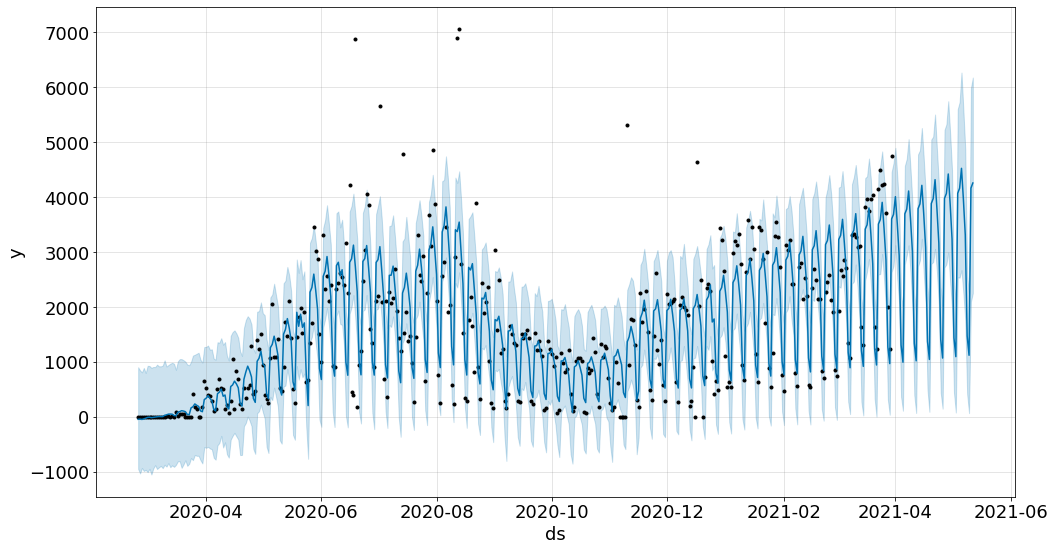

In [664]:
#sazonalidade multiplicativa. Perceba que as curvas de tendencia mudam a medida que os dados estão mais próximos
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays = feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(df_treino)
dataFramefuturo = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataFramefuturo)
fig = modelo_feriados.plot(previsao,figsize=(15,8))

In [665]:
#sazonalidade multiplicativa. Alterando o modelo para seasonality_mode='multiplicative'
#verificando quão distantes os pontos pretos estão da curva azul. 
# Esta sazonalidade a curva é mais representativa.
mean_absolute_error(df['y'],previsao['yhat'][:443])

496.8116513098662

O númeo de casos fica menor nos feriados. Pode ser por causa de não serem notificados ou porque está realmente tendo menos casos?.

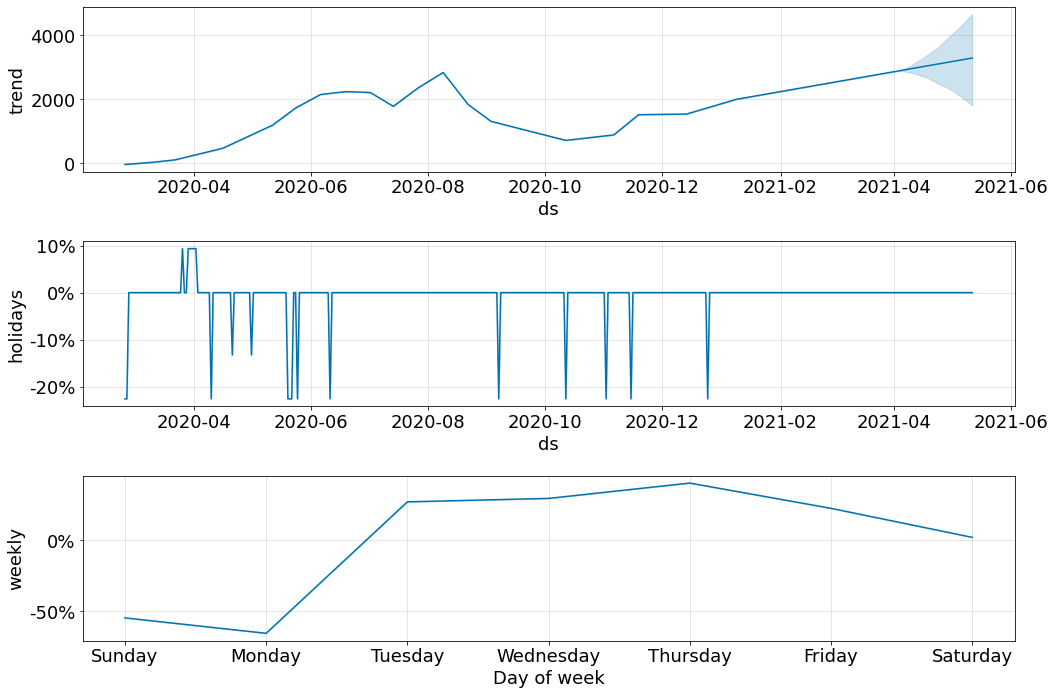

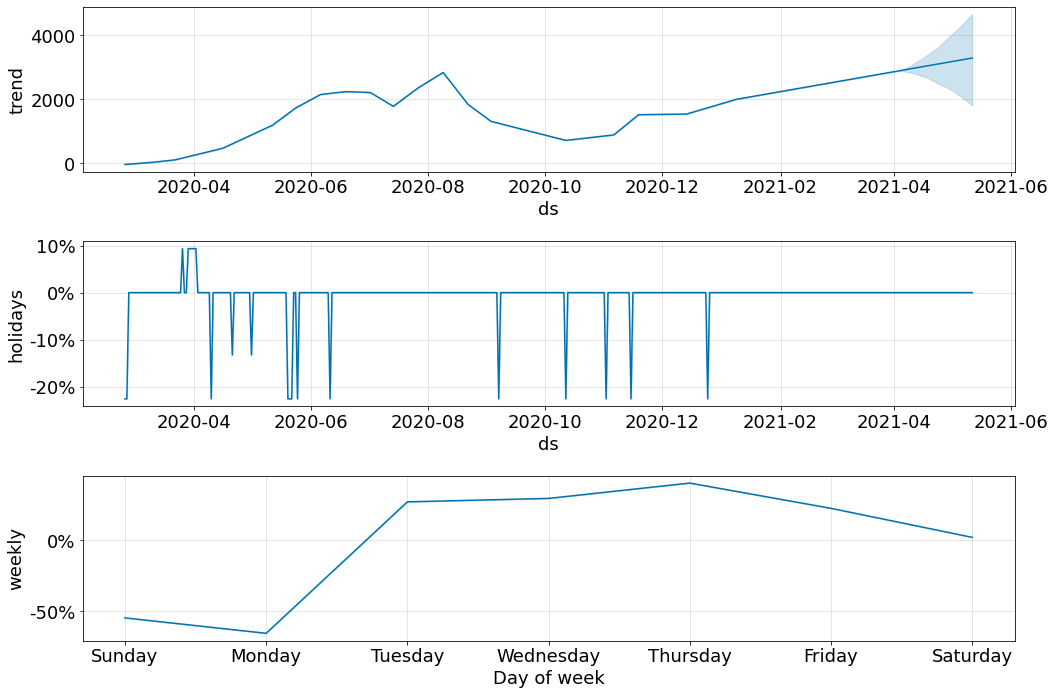

In [634]:
#verificar o impacto dos feriados. Perceba que o gráfico holidays mostra que 2021 teve um impacto maior que os feriados de 2020
modelo_feriados.plot_components(previsao,figsize=(15,10))

A diferença entre as sazonalidades estão foram colocadas mais acima na representação de cada gráfico, utilizando o método mean_absolute_error

Nesta aula, aprendemos:
 - Efeito da sazonalidade e feriados em uma série temporal;

 - Sazonalidade aditiva e sazonalidade multiplicativa;

 - Previsões considerando sazonalidade e feriados com o PROPHET.

#Aula 05 modulo 03

In [666]:
novo_y = df_treino.reset_index()

In [670]:
novo_y

index         ds     y
0       562 2020-02-25     0
1      1207 2020-02-26     0
2      1852 2020-02-27     0
3      2497 2020-02-28     1
4      3142 2020-02-29     0
..      ...        ...   ...
395  255337 2021-03-26  4241
396  255982 2021-03-27  3709
397  256627 2021-03-28  2010
398  257272 2021-03-29  1242
399  257917 2021-03-30  4748

[400 rows x 3 columns]

In [672]:
#pegar apenas os pontos que estão dentro do intevalo de confiança para um melhor ajuste.
#hat_lower e hat_upper são os pontos de confiança (linha azul clara do gráfico)
sem_outliers = novo_y[(novo_y['y'] > previsao['yhat_lower'][:400]) & (novo_y['y'] < previsao['yhat_upper'][:400])]

In [668]:
sem_outliers

index         ds     y
0       562 2020-02-25     0
1      1207 2020-02-26     0
2      1852 2020-02-27     0
3      2497 2020-02-28     1
4      3142 2020-02-29     0
..      ...        ...   ...
394  254692 2021-03-25  4214
395  255337 2021-03-26  4241
396  255982 2021-03-27  3709
397  256627 2021-03-28  2010
398  257272 2021-03-29  1242

[356 rows x 3 columns]

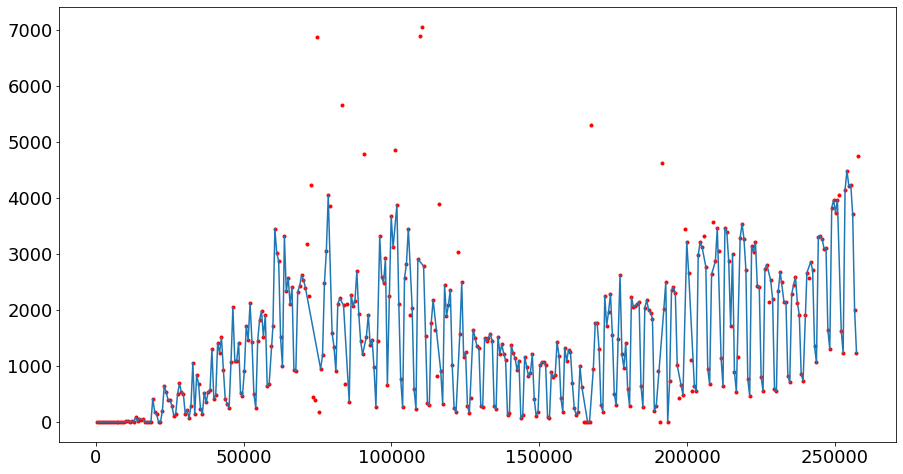

In [673]:
#perceba abaixo que os pontos fora dos yhat ficaram fora da curva
plt.plot(df_treino.index, df_treino['y'], 'r.')
plt.plot(sem_outliers['index'], sem_outliers['y'])

In [640]:
df_sem_outliers = sem_outliers[['ds','y']]

In [646]:
df_sem_outliers

ds     y
0   2020-02-25     0
1   2020-02-26     0
2   2020-02-27     0
3   2020-02-28     1
4   2020-02-29     0
..         ...   ...
394 2021-03-25  4214
395 2021-03-26  4241
396 2021-03-27  3709
397 2021-03-28  2010
398 2021-03-29  1242

[357 rows x 2 columns]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


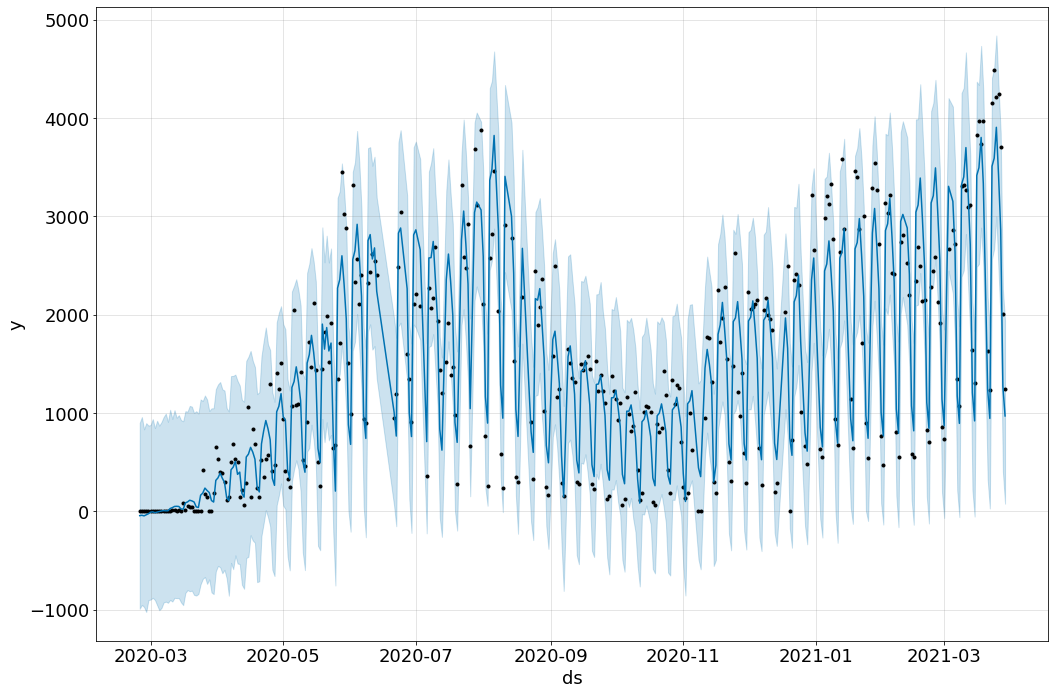

In [689]:
#sazonalidade multiplicativa. Perceba que as curvas de tendencia mudam a medida que os dados estão mais próximos
modelo_sem_outliers  = Prophet(changepoint_prior_scale=10.0, holidays = feriados, seasonality_mode='multiplicative')
modelo_sem_outliers.fit(df_sem_outliers)
dataFramefuturoSem = modelo_sem_outliers.make_future_dataframe(periods=0)
previsaoSemOutLiers = modelo_feriados.predict(dataFramefuturoSem)
fig = modelo_sem_outliers.plot(previsaoSemOutLiers,figsize=(15,10))



#perceba que a curva ficou mais próxima do intervalo de confiança. 
# os outliers devem ser tratados pois podem iviabillizar o modelo negativamente, porém podem ser tratados
# separadamente para enteder o comportamento.

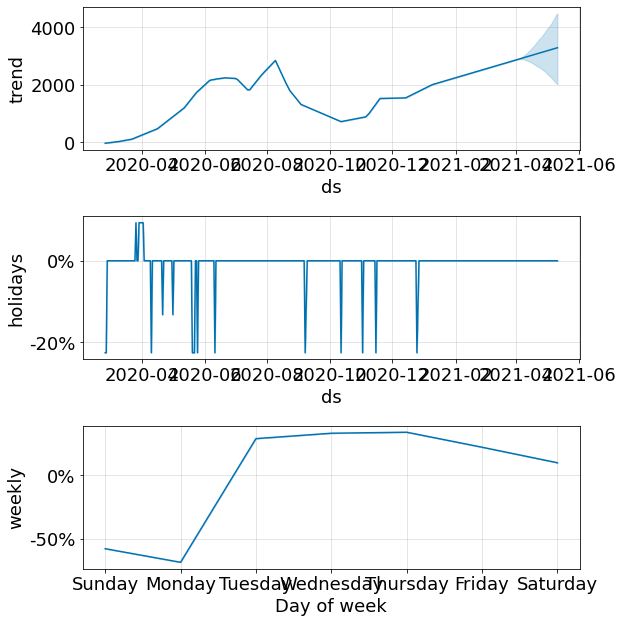

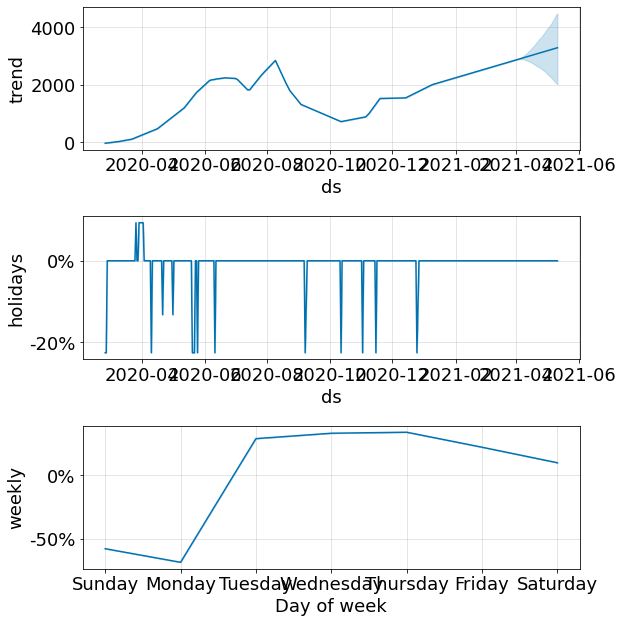

In [685]:
modelo_sem_outliers.plot_components(previsaoSemOutLiers)
#abaixo vemos o intervalo de confiança para a previsão
#grafico 1 - tendência da curva
#grafico 2 - picos negativos nos feriados

In [686]:
amostras = modelo_sem_outliers.predictive_samples(previsaoSemOutLiers)

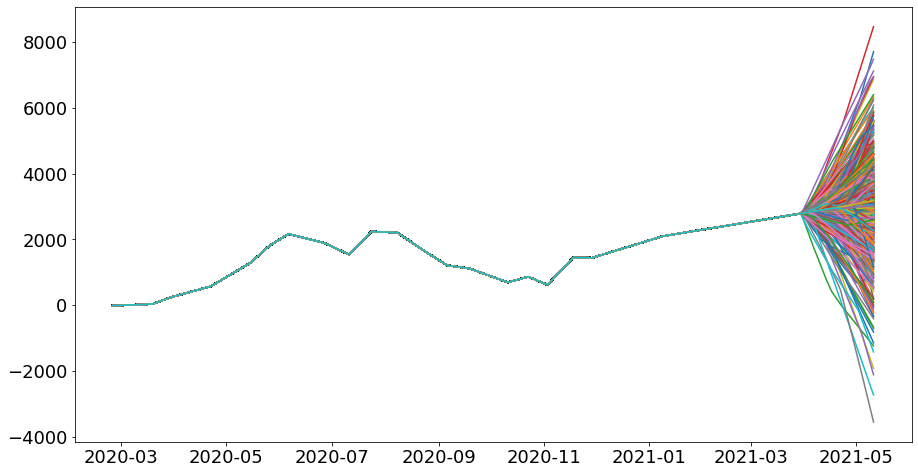

In [687]:
plt.plot(previsaoSemOutLiers['ds'],amostras['trend']);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


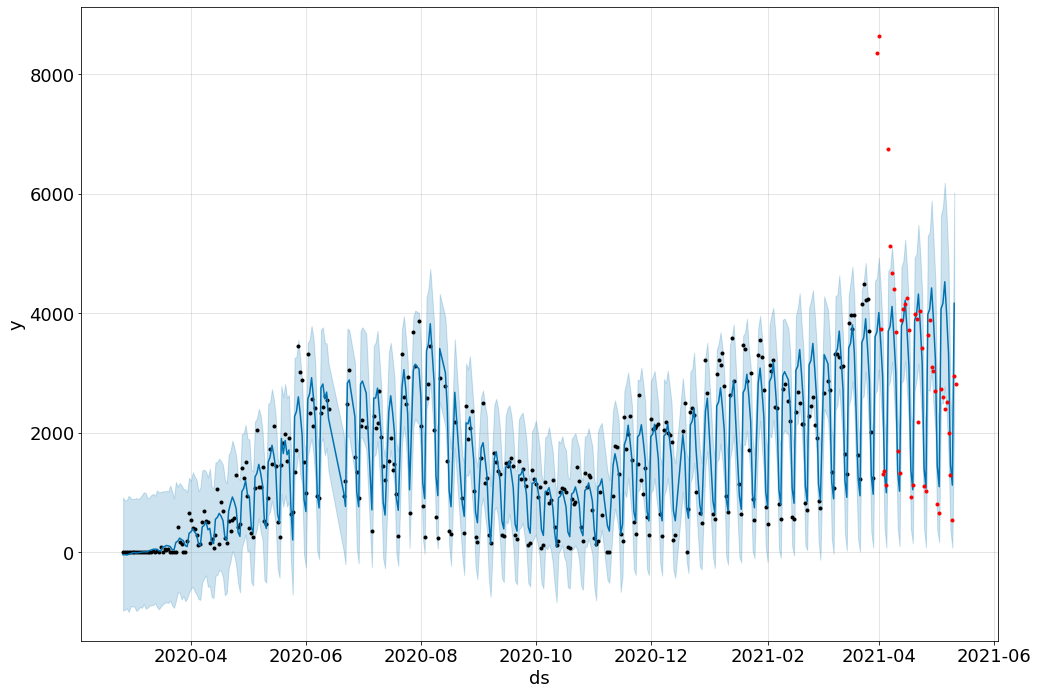

In [690]:

modelo_sem_outliers  = Prophet(changepoint_prior_scale=10.0, holidays = feriados, seasonality_mode='multiplicative')
modelo_sem_outliers.fit(df_sem_outliers)
dataFramefuturoSem = modelo_sem_outliers.make_future_dataframe(periods=43)
previsaoSemOutLiers = modelo_feriados.predict(dataFramefuturoSem)
fig = modelo_sem_outliers.plot(previsaoSemOutLiers,figsize=(15,10))
plt.plot(df_teste['ds'], df_teste['y'], '.r')


#peceba que o teste teve seus pontos na maioria dentro do intervalo de confiança.


In [691]:
from fbprophet.diagnostics import cross_validation

In [736]:
df_cv = cross_validation(modelo_sem_outliers, initial='180 days', period='30 days', horizon='30 days', parallel='processes')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fdda1cfbc10>


In [777]:
janela = 5

In [778]:
df_cv.head()

ds         yhat   yhat_lower   yhat_upper     y     cutoff
0 2020-09-02  2114.699460  1672.177587  2600.423808  1579 2020-08-31
1 2020-09-03  2168.890858  1698.703923  2605.628101  2496 2020-08-31
2 2020-09-04  2090.246554  1619.338039  2574.386378  1166 2020-08-31
3 2020-09-05  1713.745424  1212.803217  2212.448997  1245 2020-08-31
4 2020-09-06   730.266498   247.144114  1182.082095   290 2020-08-31

In [779]:
cutoff = df_cv['cutoff'].unique()

In [780]:
cutoff

array(['2020-08-31T00:00:00.000000000', '2020-09-30T00:00:00.000000000',
       '2020-10-30T00:00:00.000000000', '2020-11-29T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2021-01-28T00:00:00.000000000',
       '2021-02-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [781]:
cutoff = df_cv['cutoff'].unique()[janela]

In [782]:
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

Text(0.5, 0, 'ds')

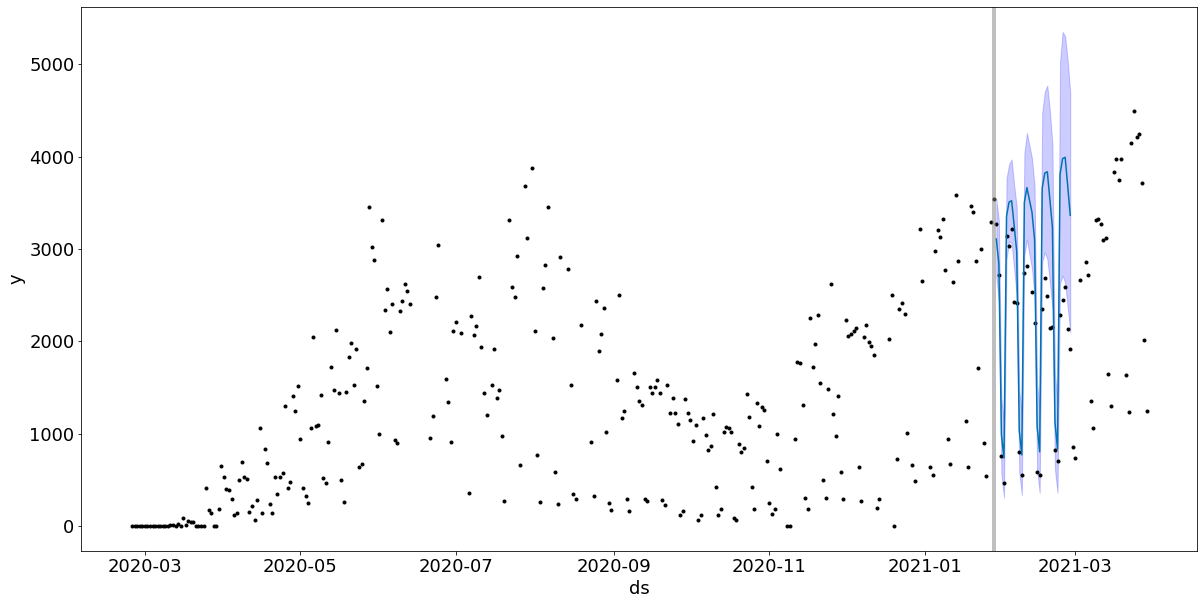

In [783]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(modelo_sem_outliers.history['ds'].values, modelo_sem_outliers.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

#trecho utilizado para teste utilizado pelo Prophet (olhar a documentação em diagnosticos)
# uma das maneiras de fazer a validação, porém não é a unica.
# tipo de validação utilizado pelo Prophet para series temporais

In [743]:
from fbprophet.diagnostics import performance_metrics

In [744]:
df_p = performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [745]:
df_p

horizon            mse        rmse         mae     mdape  coverage
0   4 days  137469.492046  370.768785  287.105161  0.229614  0.780702
1   5 days  129492.992090  359.851347  287.996081  0.229614  0.864662
2   6 days  158481.286134  398.097081  330.108375  0.204437  0.789474
3   7 days  103570.456861  321.823642  274.542449  0.138914  0.894737
4   8 days  159002.945694  398.751734  337.945709  0.155087  0.736842
5   9 days  155462.163109  394.286905  338.731542  0.216964  0.721805
6  10 days  194917.724017  441.494874  395.037094  0.253859  0.684211
7  11 days  159782.015950  399.727427  354.222076  0.216964  0.857143
8  12 days  153599.960553  391.918309  320.726646  0.208855  0.902256
9  13 days  203722.322083  451.356092  355.514613  0.237421  0.842105
10 14 days  248066.863677  498.063112  396.616348  0.237421  0.744361
11 15 days  338170.899638  581.524634  502.104950  0.319515  0.646617
12 16 days  316212.837812  562.328052  475.884269  0.323566  0.631579
13 17 days  330895.892853  575.235511  488.117703  0.319515  0.614035
14 18 days  413409.911327  642.969604  515.272933  0.323566  0.616541
15 19 days  470959.099073  686.264598  526.166899  0.390642  0.649123
16 20 days  625655.353982  790.983789  620.088508  0.333708  0.631579
17 21 days  680865.357499  825.145658  660.461749  0.422971  0.593985
18 22 days  695724.281165  834.100882  690.873379  0.353939  0.601504
19 23 days  566266.088668  752.506537  630.890746  0.494141  0.657895
20 24 days  509735.390370  713.957555  601.466129  0.422648  0.714286
21 25 days  507311.381436  712.257946  572.710331  0.356312  0.766917
22 26 days  808346.692887  899.081027  686.892851  0.356312  0.714286
23 27 days  940072.882277  969.573557  757.297686  0.372441  0.691729
24 28 days  998361.627804  999.180478  794.263147  0.372441  0.631579
25 29 days  809224.677023  899.569162  728.229755  0.540032  0.684211
26 30 days  681732.913190  825.671190  672.086631  0.540032  0.684211

In [746]:
from fbprophet.plot import plot_cross_validation_metric

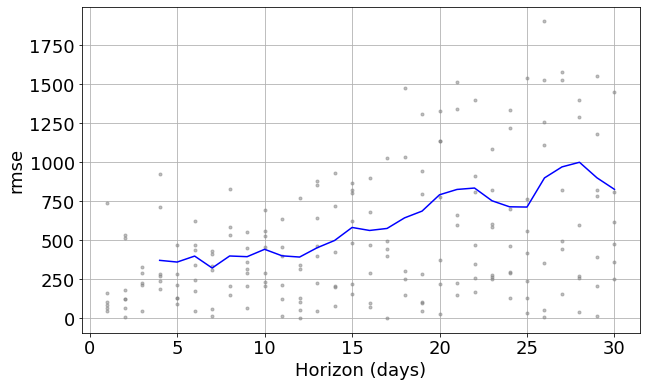

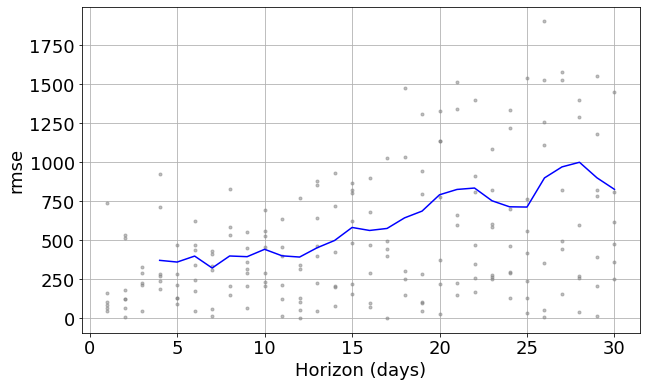

In [747]:
plot_cross_validation_metric(df_cv, metric='rmse')
#o erro vai ficando mais disperso ao passar os dias. Quanto menos dispersos melhor.
#Acertar mais pegar menos dias. Quer prever mais dias, as chances de erros aumentam.
# Horizon  = Tempo (Dias)
# REMSE = Erro nas previsões.

Nesta aula, aprendemos:
 - Tratamento de outliers;
 - Intervalo de confiança;
 - Validação cruzada de encadeamento direto;
 - Métricas de performance.